<a href="https://colab.research.google.com/github/chanu0073/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import yfinance as yf

In [18]:
start = '2014-01-01'
end = '2025-04-03'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [19]:
data.shape

(2830, 5)

In [20]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697502,27.735676,27.427795,27.590661,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290216,28.441183,28.093389,28.408461,90036218
...,...,...,...,...,...
2025-03-27,164.080002,167.440002,163.850006,166.710007,21571200
2025-03-28,156.059998,163.809998,155.339005,162.360001,34866500


In [21]:
data.reset_index(inplace=True)

In [22]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
1,2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2,2014-01-06,27.697502,27.735676,27.427795,27.590661,71037271
3,2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
4,2014-01-08,28.290216,28.441183,28.093389,28.408461,90036218
...,...,...,...,...,...,...
2825,2025-03-27,164.080002,167.440002,163.850006,166.710007,21571200
2826,2025-03-28,156.059998,163.809998,155.339005,162.360001,34866500
2827,2025-03-31,156.229996,157.130005,152.210007,154.809998,33591600


In [23]:
data.shape

(2830, 6)

In [29]:
data.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


Moving Avg for 100 days

In [24]:
ma_100_days = data.Close.rolling(100).mean()

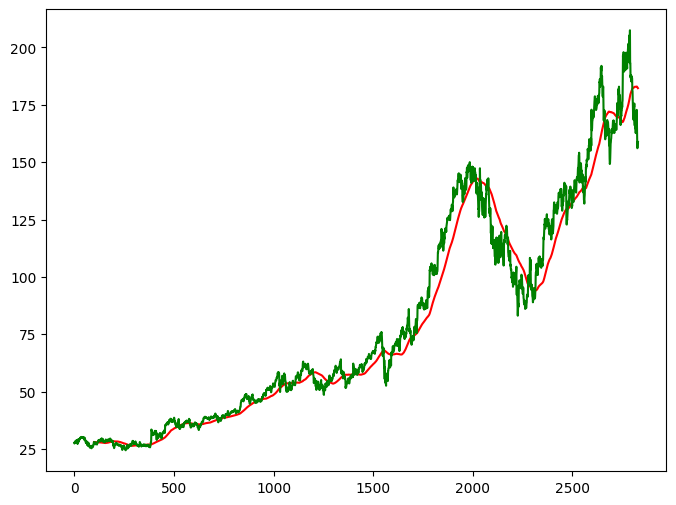

In [26]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

Moving Avg for 200 days

In [27]:
ma_200_days = data.Close.rolling(200).mean()

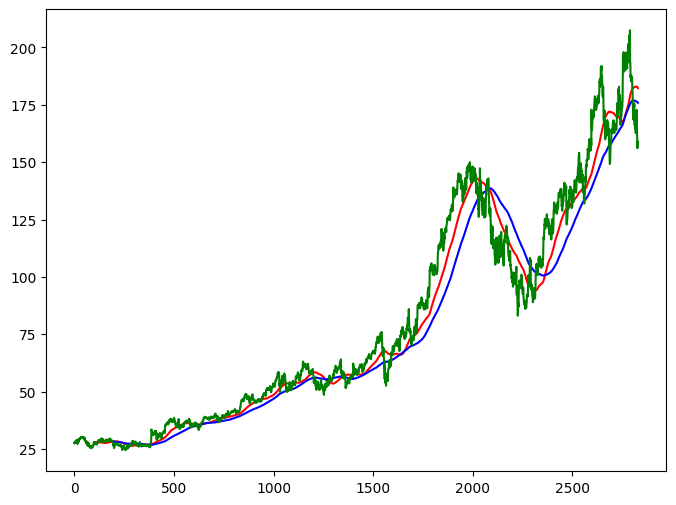

In [28]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [30]:
data.dropna(inplace=True)

In [31]:
train_data = data.Close[0: int(len(data)*0.8)]
test_data = data.Close[int(len(data)*0.8): len(data)]

In [33]:
train_data.shape

(2264, 1)

In [34]:
test_data.shape

(566, 1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

**MinMaxScaler**


---


X' = (X - Xmin)/(Xmax - Xmin)  

In [36]:
train_data_scaled = scaler.fit_transform(train_data)